### <strong>EDA - Exploratory analysis in an automatic coffee sales database</strong>

The goal with this project is to explore this database as much as possible. I believe I arrived at some very interesting results, <strong>mainly in understanding how the change in the unit price of drinks (as will be seen) affected the machine's sales</strong>.

#### Overview (Taken from Kaggle)
This dataset contains detailed records of coffee sales from a vending machine.
The vending machine is the work of a dataset author who is committed to providing an open dataset to the community.
It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.

#### Data collection period
- The dataset spans from March 2024 to July 2024 (<strong>4 months</strong>), capturing daily transaction data. 

#### Columns of the dataframe:
- <strong>Date</strong>-> expresses the date the sale was made.
- <strong>Datetime</strong>-> expresses the date and time the sale was made.
- <strong>cash_type</strong>-> expresses what type of payment the sale was made. Could be card or cash.
- <strong>card</strong>-> registration code that the machine creates when making sales on the card.
- <strong>money</strong>-> the amount paid for the purchase.
- <strong>coffee_name</strong>-> the name of the type of drink that was sold.

#### Author Name on Kaggle
- Yaroslav Isaienkov
- https://www.kaggle.com/dsv/8982902

#### OBS
- the database presents the values ​​in Ukrainian currency, therefore it will be presented in <strong>"Ukrainian Hryvnia" (UAH)</strong>

#### importing libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from datetime import datetime
import numpy as np

#### importing and processing the database


In [2]:
# Importing the coffee sales database
coffee_sales = pd.read_excel('coffe_sales.xlsx')

display(coffee_sales.head())

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [3]:
# Exploring the data types
display(coffee_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         896 non-null    datetime64[ns]
 1   datetime     896 non-null    object        
 2   cash_type    896 non-null    object        
 3   card         807 non-null    object        
 4   money        896 non-null    float64       
 5   coffee_name  896 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 42.1+ KB


None

There are 89 missing data in the "card" column, as it does not record anything when the payment was in cash, as it is, it is a column for
only registering the buyer's card, having no impact on other variables, it is advisable to remove this entire column from the analysis, as
instead of losing 89 data from a base of just 896.

The "datetime" column is in the form of an object, and it also has a date and time, having a redundancy between the "date" and "datetime" columns, so we will leave this column with just the time and discard the date, which can be useful to leave a column with just the time.


In [4]:
# Dropping the column "card"
coffee_sales = coffee_sales.drop(['card'], axis=1)

display(coffee_sales)

,date,datetime,cash_type,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,38.70,Latte
...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,37.72,Hot Chocolate


In [5]:
# converting "datetime" column to datetime type and removing millisecond values
coffee_sales['datetime'] = pd.to_datetime(coffee_sales['datetime']).dt.floor('S')

# Separating only the time from the "datetime" column
coffee_sales['time'] = coffee_sales['datetime'].dt.time 

display(coffee_sales.head())


,date,datetime,cash_type,money,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50,card,38.7,Latte,10:15:50
1,2024-03-01,2024-03-01 12:19:22,card,38.7,Hot Chocolate,12:19:22
2,2024-03-01,2024-03-01 12:20:18,card,38.7,Hot Chocolate,12:20:18
3,2024-03-01,2024-03-01 13:46:33,card,28.9,Americano,13:46:33
4,2024-03-01,2024-03-01 13:48:14,card,38.7,Latte,13:48:14


In [6]:
# deleting the "datetime" column
coffee_sales = coffee_sales.drop(['datetime'], axis=1)

# Rearranging the "time" column
coffee_sales = coffee_sales[['date','time','cash_type','money','coffee_name']]

display(coffee_sales.head())

,date,time,cash_type,money,coffee_name
0,2024-03-01,10:15:50,card,38.7,Latte
1,2024-03-01,12:19:22,card,38.7,Hot Chocolate
2,2024-03-01,12:20:18,card,38.7,Hot Chocolate
3,2024-03-01,13:46:33,card,28.9,Americano
4,2024-03-01,13:48:14,card,38.7,Latte


### Data visualization


#### What is the most sold type of drink?

In [7]:
# creating best-selling drink table
best_selling_drinks = coffee_sales.groupby('coffee_name').sum(numeric_only=True).sort_values(by='money', ascending=False).reset_index()

display(best_selling_drinks)

,coffee_name,money
0,Latte,7151.62
1,Americano with Milk,6738.14
2,Cappuccino,6253.50
3,Americano,3786.42
4,Cortado,2422.80
5,Hot Chocolate,2417.46
6,Cocoa,995.66
7,Espresso,827.34


Text(0, 0.5, 'Revenue (UAH)')

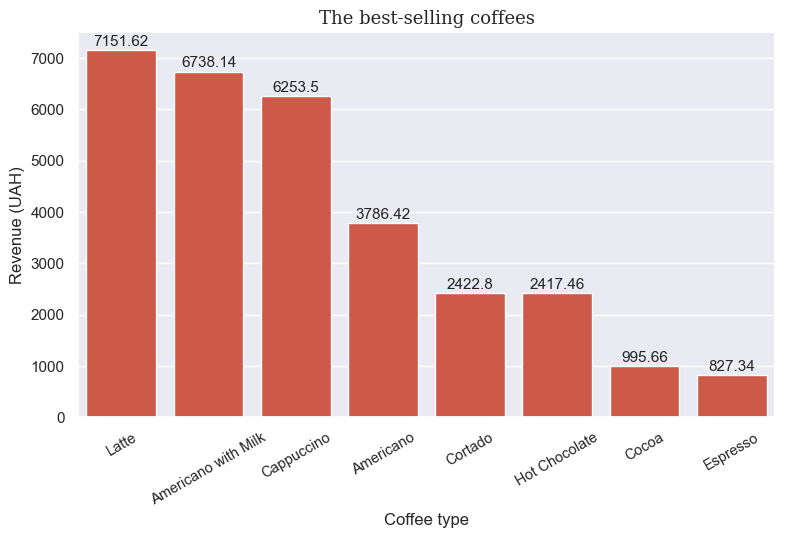

In [23]:
# plotting the best-selling drinks graph

# defining an axis system for the chart
fig, ax = plt.subplots(figsize=(9, 5))

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a bar chart 
ax = sns.barplot(ax=ax, x=best_selling_drinks['coffee_name'], y=best_selling_drinks['money'])

# customizing the chart
ax.bar_label(ax.containers[0], padding=1, fontsize=11)
ax.set_title('The best-selling coffees', fontfamily='serif', fontsize=13)
ax.set_xlabel('Coffee type')
ax.set_xticks(ticks=best_selling_drinks['coffee_name'], labels=best_selling_drinks['coffee_name'], fontsize=10.5, rotation= 30)
ax.set_ylabel('Revenue (UAH)')


Latte, Americano with milk and cappuccino are the top 3 most sold drinks, with espresso being the least sold.

#### Which payment method does the most coffee sell?


In [9]:
# creating the most used payment type table
payment_method_most_sold = coffee_sales[['cash_type','money']].groupby('cash_type').sum(numeric_only=True).sort_values(by='money', ascending=False).reset_index()
display(payment_method_most_sold)


,cash_type,money
0,card,27406.94
1,cash,3186.00


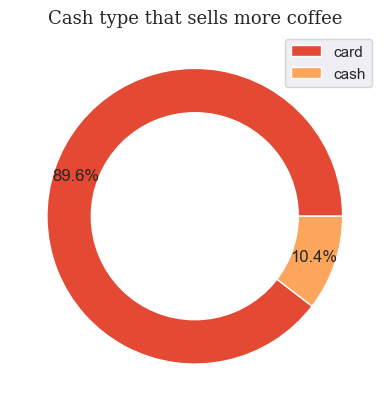

In [10]:
# plotting the most used payment type graph

# defining an axis system for the chart
fig, ax = plt.subplots()

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a pie chart
ax.pie(payment_method_most_sold['money'], 
        autopct='%1.1f%%', pctdistance=0.85
        )

# customizing the chart
plt.title("Cash type that sells more coffee", fontfamily='serif', fontsize=13)
plt.legend(payment_method_most_sold['cash_type'])

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

#### which type of coffee is most expensive?

For this indicator, we will be plotting two different graphs, to see if there is a difference between the unit price values ​​on the card and in cash

In [11]:
# Creating a database with the "cash_type = card"
coffee_sales_card = coffee_sales.loc[coffee_sales['cash_type']=='card', :]

# Creating a table with the most expensive type of coffe on card
most_expensive_card = coffee_sales_card[['coffee_name','money']].groupby('coffee_name').max().sort_values(by='money', ascending=False).reset_index()
display(most_expensive_card)


,coffee_name,money
0,Cappuccino,38.7
1,Cocoa,38.7
2,Hot Chocolate,38.7
3,Latte,38.7
4,Americano with Milk,33.8
5,Americano,28.9
6,Cortado,28.9
7,Espresso,24.0


In [12]:
# Creating a database with the "cash_type = cash"
coffee_sales_cash = coffee_sales.loc[coffee_sales['cash_type']=='cash', :]

# Creating a table with the most expensive type of coffe on cash
most_expensive_cash = coffee_sales_cash[['coffee_name','money']].groupby('coffee_name').max().sort_values(by='money', ascending=False).reset_index()
display(most_expensive_cash)

,coffee_name,money
0,Cappuccino,40.0
1,Cocoa,40.0
2,Hot Chocolate,40.0
3,Latte,40.0
4,Americano with Milk,35.0
5,Americano,30.0
6,Cortado,30.0
7,Espresso,25.0


(0.0, 45.0)

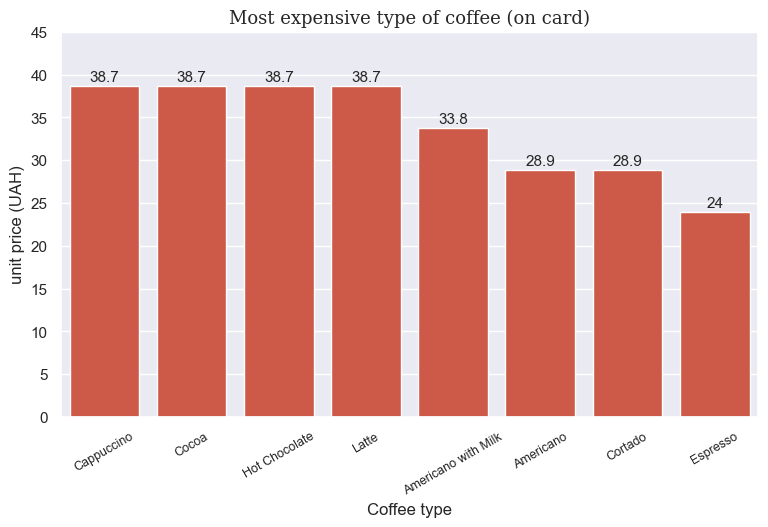

In [13]:
# plotting the most The most expensive type of coffee on card
fig, ax = plt.subplots(figsize=(9,5))

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a bar chart
ax = sns.barplot(ax=ax, x=most_expensive_card['coffee_name'], y=most_expensive_card['money'])

# customizing the chart
ax.bar_label(ax.containers[0], padding=1, fontsize=11)
ax.set_title('Most expensive type of coffee (on card)', fontfamily='serif', fontsize=13)
ax.set_xlabel('Coffee type')
ax.set_xticks(ticks=most_expensive_card['coffee_name'], labels=most_expensive_card['coffee_name'], fontsize=9, rotation= 30)
ax.set_ylabel('unit price (UAH)')
ax.set_ylim(0, 45)


<strong>Insight</strong>: In terms of money there is no top 1 to consider the most expensive, the drinks have similar values, being 
4 of them have the same value, which is 38.7. Considering the graph of "the best-selling coffees", the reason why "Latte" is the most sold cannot be due to its unit price, as well as the reason why "Espresso" is the least sold.

(0.0, 45.0)

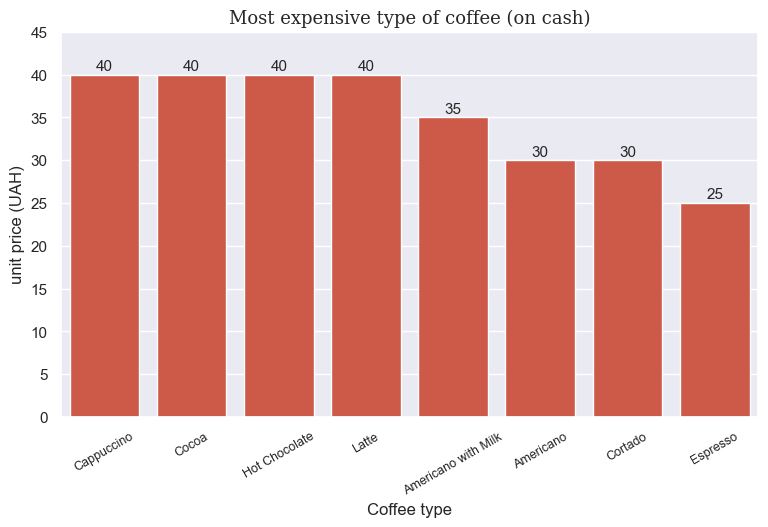

In [14]:
# plotting the most The most expensive type of coffee on cash

# defining an axis system for the chart
fig, ax = plt.subplots(figsize=(9,5))

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a bar chart
ax = sns.barplot(ax=ax, x=most_expensive_cash['coffee_name'], y=most_expensive_cash['money'])

# customizing the chart
ax.bar_label(ax.containers[0], padding=1, fontsize=11)
ax.set_title('Most expensive type of coffee (on cash)', fontfamily='serif', fontsize=13)
ax.set_xlabel('Coffee type')
ax.set_xticks(ticks=most_expensive_cash['coffee_name'], labels=most_expensive_cash['coffee_name'], fontsize=9, rotation= 30)
ax.set_ylabel('unit price (UAH)')
ax.set_ylim(0, 45)


<strong>Insight</strong>: Just like with cards, with cash there is no top 1 to consider the most expensive, but something interesting is
that with cash, drinks are more expensive than with cards, perhaps there is a reason why people preferred to make purchases at
card, which is why in the "Cash type that sells more coffee" graph, we see that 89.6% buy with the card.

#### There was variation in the price of coffee throughout the 4-month sales period ?

In [15]:
# creating a list of unique values ​​from the "coffee_name" column
coffee_sales_unique = coffee_sales['coffee_name'].unique()
display(coffee_sales_unique)

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

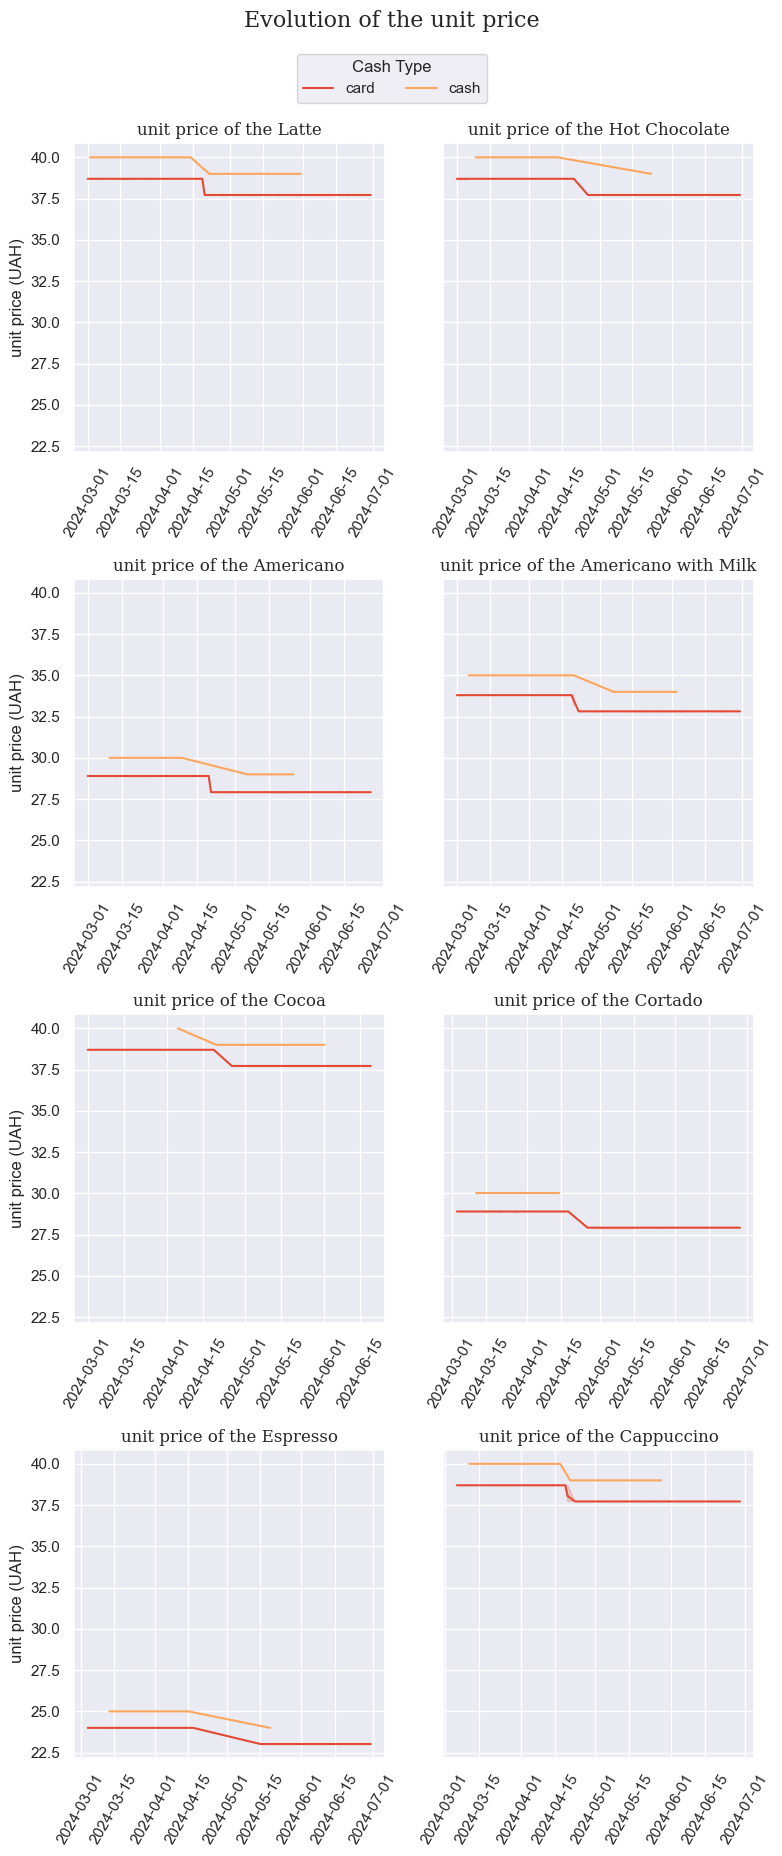

In [16]:
# Plotting the evolution of the unit price graph

# defining an axis system for the chart
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(8, 18), sharey=True, tight_layout=True) 

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a loop for each coffee_type value in the list
for i, coffee_type in enumerate(coffee_sales_unique):
    # Creating a table for each type of coffee separately to them create a chart for each of them
    coffee_sales_coffee = coffee_sales.loc[coffee_sales['coffee_name']== coffee_type, :]

    # Creating a line chart
    ax = sns.lineplot(ax=axs.flat[i], data=coffee_sales_coffee, x=coffee_sales_coffee['date'], 
                      y=coffee_sales_coffee['money'], hue=coffee_sales_coffee['cash_type']
                      )
    
    # customizing the chart
    ax.set_title(f'unit price of the {coffee_type}', fontfamily='serif')
    ax.tick_params(axis='x', labelrotation=60) 
    ax.set_ylabel('unit price (UAH)')
    ax.set_xlabel('')
    ax.set_ylim(auto=True)

    legend = ax.get_legend()
    legend.remove()

# Adding a legend on the figure
labels = [text.get_text() for text in legend.get_texts()]
fig.legend(handles=legend.legend_handles, labels=labels, loc='upper center', ncols=2, title='Cash Type', bbox_to_anchor=(0.5, 1.01))

# Adding a title on the figure
fig.suptitle('Evolution of the unit price', fontsize=16, x=0.5, y= 1.03, fontfamily='serif')
plt.subplots_adjust(wspace=0.4, hspace=0.4, top=0.925)

fig.align_labels()

plt.show()


<Strong>Insight</Strong>-> We can see that in the period of 4 months available until then, all types of drinks had a drop in unit price, both in payment by card, as well as cash, and in all cases the change occurs on separate dates, but at the same time very close to one of the
others. The price drop may indicate a subtle attempt to improve sales, as the price drop wasn't drastic for no type of drink.

The following two graphs are an analysis of the following problem: <strong>after changing the unit value of the drinks, did the machine sell more or less than expected</strong>?

#### What is the total sales per day?

In [17]:
# Creating the sales per day table
coffee_sales_per_day = coffee_sales[['money','date']].groupby('date').sum(numeric_only=True).reset_index()
display(coffee_sales_per_day)


,date,money
0,2024-03-01,396.30
1,2024-03-02,228.10
2,2024-03-03,349.10
3,2024-03-04,135.20
4,2024-03-05,338.50
...,...,...
114,2024-06-26,196.92
115,2024-06-27,131.28
116,2024-06-28,159.20
117,2024-06-29,287.06


Text(0, 0.5, '')

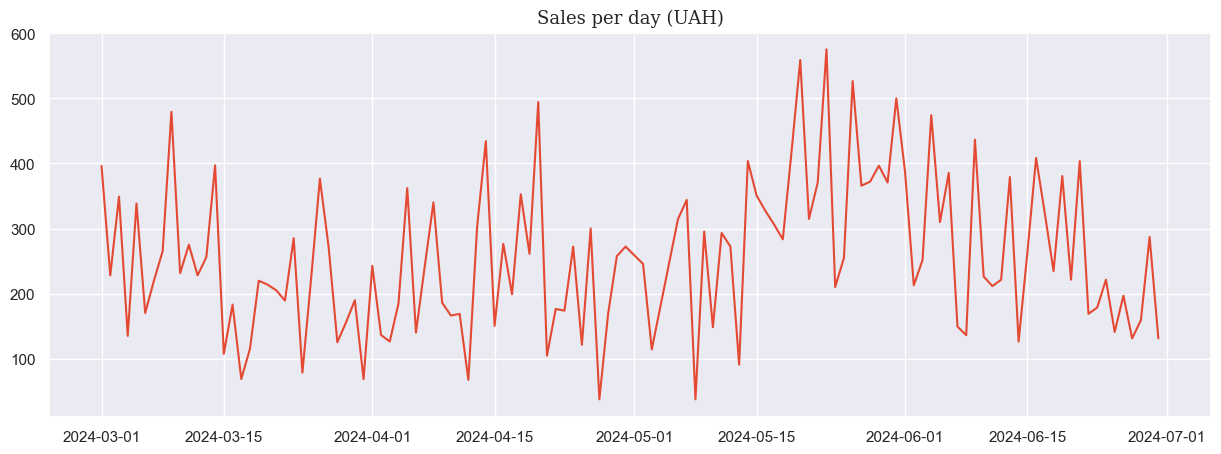

In [18]:
# Plotting the sales per day graph

# defining an axis system for the chart
fig, ax = plt.subplots(figsize=(15, 5))

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a line chart
ax = sns.lineplot(ax=ax, x=coffee_sales_per_day['date'], y=coffee_sales_per_day['money'], data=coffee_sales_per_day)

# customizing the chart
ax.set_title("Sales per day (UAH)", fontfamily='serif', fontsize=13)
ax.set_xlabel("")
ax.set_ylabel("")

<strong>Insight</strong>-> Apparently there is no pattern when analyzing the daily sales graph day by day, as there is a very large variation, the closest we can consider perhaps is between 15/05 and 10/06, where there is an average of sales greater than 200UAH at the same time as We have the biggest daily sales, exceeding 500UAH. Let's look at sales per month to see the evolution of the machine's sales more clearly. 

#### What is the total sales per month ?

In [19]:
# Extracting only the month, from the "date" comlumn 
coffee_sales['Month'] = coffee_sales['date'].dt.month
display(coffee_sales.head())

,date,time,cash_type,money,coffee_name,Month
0,2024-03-01,10:15:50,card,38.7,Latte,3
1,2024-03-01,12:19:22,card,38.7,Hot Chocolate,3
2,2024-03-01,12:20:18,card,38.7,Hot Chocolate,3
3,2024-03-01,13:46:33,card,28.9,Americano,3
4,2024-03-01,13:48:14,card,38.7,Latte,3


In [20]:
# Creating the coffee sales per month table
coffee_sales_per_month = coffee_sales[['money','Month']].groupby('Month').sum().reset_index()
display(coffee_sales_per_month)

,Month,money
0,3,7050.20
1,4,6720.56
2,5,9063.42
3,6,7758.76


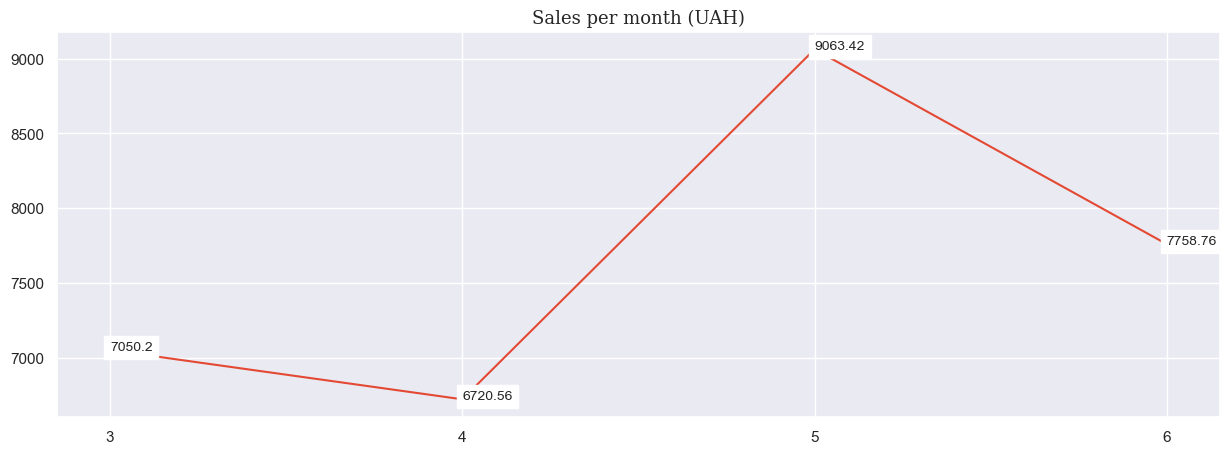

In [21]:
# Plotting the Sales per month graph

# defining an axis system for the chart
fig, ax = plt.subplots(figsize=(15, 5))

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a line chart
ax = sns.lineplot(ax=ax, x=coffee_sales_per_month['Month'], y=coffee_sales_per_month['money'], 
                  data=coffee_sales_per_month 
                  )

# customizing the chart
ax.set_xticks(ticks=coffee_sales_per_month['Month'])
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Sales per month (UAH)", fontfamily='serif', fontsize=13)


# adding the values in each point of the graph
for x, y in zip(coffee_sales_per_month['Month'], coffee_sales_per_month['money']):
    plt.text(x=x, y=y, s=y, fontsize=10, ha='left').set_backgroundcolor('w')


<strong>Insight</strong>-> in month 4 is where we see the change in the unit price of each drink to a lower price as seen in the graph 
"Evolution of the unit price", and precisely in month 5 we can see an evolution in the monthly gain, this increase can already be seen in the graph of "sales per day", and here it only becomes clearer that <strong>the reduction in the unit price of drinks made a significant difference in the machine's sales in a positive way</strong>.


#### what time do people drink coffee the most ?

Text(0.5, 1.0, 'Time that people drink coffe')

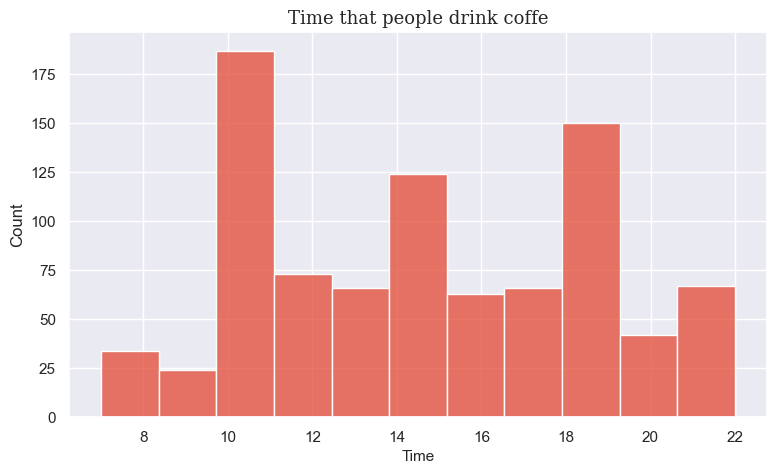

In [22]:
# Plotting the time that people drink coffee graph

# Creating a list that will extract only the hour from each value in the "time" column
lista_horas = [t.hour for t in coffee_sales['time']]

# defining an axis system for the chart
fig, ax = plt.subplots(figsize=(9, 5))

# Setting the theme for the chart
sns.set_theme(style='darkgrid', palette= 'RdYlBu', context='notebook')

# Creating a histogram chart
ax = sns.histplot(ax=ax, x=lista_horas, data=coffee_sales)

# customizing the chart
ax.set_xlabel('Time', fontsize=11)
ax.set_title('Time that people drink coffe', fontfamily='serif', fontsize=13)


<strong>Insight</strong>-> There are 3 interval peaks on the graph, indicating that the first and largest peak is between 10 and 11 am, indicating that the majority of people like to drink coffee a few hours before lunch, or even as their first coffee of the day. The second peak being between 14 and 15, indicates a high number of people drink coffee after lunch, and the last peak, between 6pm and 7pm, heading into the evening, indicates that many people also like to drink coffee at night.